In [23]:
import cira 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from os.path import exists

cira.auth.KEY_FILE = "../alpc_key.json"
assert cira.auth.check_keys(), "the set keys dose not work"

SYMBOL = "AAPL"
SYM_HIST_FILE = f'./{SYMBOL.replace("/", "_")}.csv'

stk = cira.Stock(SYMBOL)

if not exists(SYM_HIST_FILE): # chacheing historical data  
    start = datetime(2016, 1, 1).date()
    end = datetime.now().date()
    stk.save_historical_data(SYM_HIST_FILE, start, end)

data = stk.load_historical_data(SYM_HIST_FILE)
data.drop(columns=["symbol"], inplace=True)
data.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2016-01-04 05:00:00+00:00,23.26,23.88,23.12,23.88,287741356.0,351452.0,23.59
2016-01-05 05:00:00+00:00,23.97,23.99,23.21,23.28,234762144.0,321365.0,23.44
2016-01-06 05:00:00+00:00,22.79,23.20,22.64,22.82,284319308.0,409164.0,22.86
2016-01-07 05:00:00+00:00,22.37,22.70,21.86,21.86,343985812.0,462836.0,22.22
2016-01-08 05:00:00+00:00,22.34,22.46,21.93,21.98,300265168.0,419555.0,22.19


### Bollinger bands

In [24]:
data["sma"] = data["close"].rolling(window=20).mean() # simple moving avrage 
data["sd"] = data["close"].rolling(window=20).std()

data["ub"] = data["sma"] + 2 * data["sd"]
data["lb"] = data["sma"] - 2 * data["sd"]
data.tail()

,open,high,low,close,volume,trade_count,vwap,sma,sd,ub,lb
timestamp,,,,,,,,,,,
2024-07-08 04:00:00+00:00,227.09,227.85,223.2500,227.82,59085861.0,790096.0,226.363450,212.6500,8.361706,229.373412,195.926588
2024-07-09 04:00:00+00:00,227.93,229.40,226.3721,228.68,48169822.0,651068.0,228.216460,214.2395,8.228633,230.696765,197.782235
2024-07-10 04:00:00+00:00,229.30,233.08,229.2500,232.98,62627687.0,782526.0,231.661382,216.2325,7.651039,231.534578,200.930422
2024-07-11 04:00:00+00:00,231.39,232.39,225.7700,227.57,64710617.0,889309.0,228.461340,217.2535,7.737223,232.727947,201.779053
2024-07-12 04:00:00+00:00,228.92,232.64,228.6800,230.54,53046527.0,706283.0,230.957659,218.1270,8.211664,234.550329,201.703671


### Relative Strength Index

In [25]:
delta = data["open"].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta<0,0)
win_size = 20
avg_gain = gain.rolling(win_size).mean()
avg_loss = loss.rolling(win_size).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
data["rsi"] = rsi
data.tail()

,open,high,low,close,volume,trade_count,vwap,sma,sd,ub,lb,rsi
timestamp,,,,,,,,,,,,
2024-07-08 04:00:00+00:00,227.09,227.85,223.2500,227.82,59085861.0,790096.0,226.363450,212.6500,8.361706,229.373412,195.926588,72.491585
2024-07-09 04:00:00+00:00,227.93,229.40,226.3721,228.68,48169822.0,651068.0,228.216460,214.2395,8.228633,230.696765,197.782235,73.901178
2024-07-10 04:00:00+00:00,229.30,233.08,229.2500,232.98,62627687.0,782526.0,231.661382,216.2325,7.651039,231.534578,200.930422,73.567064
2024-07-11 04:00:00+00:00,231.39,232.39,225.7700,227.57,64710617.0,889309.0,228.461340,217.2535,7.737223,232.727947,201.779053,77.922462
2024-07-12 04:00:00+00:00,228.92,232.64,228.6800,230.54,53046527.0,706283.0,230.957659,218.1270,8.211664,234.550329,201.703671,69.128351


### Moving Avrage 

In [26]:
data["20_sma"]  =  data["open"].rolling(window=20).mean()
data["50_sma"]  =  data["open"].rolling(window=50).mean()
data["200_sma"] =  data["open"].rolling(window=200).mean()
data.tail()

,open,high,low,close,volume,trade_count,vwap,sma,sd,ub,lb,rsi,20_sma,50_sma,200_sma
timestamp,,,,,,,,,,,,,,,
2024-07-08 04:00:00+00:00,227.09,227.85,223.2500,227.82,59085861.0,790096.0,226.363450,212.6500,8.361706,229.373412,195.926588,72.491585,211.6125,195.9159,184.289425
2024-07-09 04:00:00+00:00,227.93,229.40,226.3721,228.68,48169822.0,651068.0,228.216460,214.2395,8.228633,230.696765,197.782235,73.901178,213.2765,197.0887,184.536275
2024-07-10 04:00:00+00:00,229.30,233.08,229.2500,232.98,62627687.0,782526.0,231.661382,216.2325,7.651039,231.534578,200.930422,73.567064,214.8965,198.2817,184.813425
2024-07-11 04:00:00+00:00,231.39,232.39,225.7700,227.57,64710617.0,889309.0,228.461340,217.2535,7.737223,232.727947,201.779053,77.922462,216.7835,199.4469,185.100425
2024-07-12 04:00:00+00:00,228.92,232.64,228.6800,230.54,53046527.0,706283.0,230.957659,218.1270,8.211664,234.550329,201.703671,69.128351,217.8610,200.5635,185.377425


In [27]:
data["signal"] = data["open"] - data["open"].min()
data = data.fillna(0)
data.head()

,open,high,low,close,volume,trade_count,vwap,sma,sd,ub,lb,rsi,20_sma,50_sma,200_sma,signal
timestamp,,,,,,,,,,,,,,,,
2016-01-04 05:00:00+00:00,23.26,23.88,23.12,23.88,287741356.0,351452.0,23.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.63
2016-01-05 05:00:00+00:00,23.97,23.99,23.21,23.28,234762144.0,321365.0,23.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.34
2016-01-06 05:00:00+00:00,22.79,23.20,22.64,22.82,284319308.0,409164.0,22.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.16
2016-01-07 05:00:00+00:00,22.37,22.70,21.86,21.86,343985812.0,462836.0,22.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.74
2016-01-08 05:00:00+00:00,22.34,22.46,21.93,21.98,300265168.0,419555.0,22.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.71


### Fixed horizen return 

In [28]:

horizon = 15
data['return'] = (data['close'].shift(-horizon) - data['close']) / data['close']
threshold = 0.03
data['signal'] = np.where(data['return'] > threshold, 1, np.where(data['return'] < -threshold, -1, 0))
data.drop(columns=["return"], inplace=True)
data.head()

,open,high,low,close,volume,trade_count,vwap,sma,sd,ub,lb,rsi,20_sma,50_sma,200_sma,signal
timestamp,,,,,,,,,,,,,,,,
2016-01-04 05:00:00+00:00,23.26,23.88,23.12,23.88,287741356.0,351452.0,23.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2016-01-05 05:00:00+00:00,23.97,23.99,23.21,23.28,234762144.0,321365.0,23.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2016-01-06 05:00:00+00:00,22.79,23.20,22.64,22.82,284319308.0,409164.0,22.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2016-01-07 05:00:00+00:00,22.37,22.70,21.86,21.86,343985812.0,462836.0,22.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2016-01-08 05:00:00+00:00,22.34,22.46,21.93,21.98,300265168.0,419555.0,22.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [29]:
data["signal"].value_counts()

signal
 1    983
 0    682
-1    480
Name: count, dtype: int64

In [30]:
data.drop(columns=["open", "high", "low", "volume", "trade_count"], inplace=True)
data.head()

,close,vwap,sma,sd,ub,lb,rsi,20_sma,50_sma,200_sma,signal
timestamp,,,,,,,,,,,
2016-01-04 05:00:00+00:00,23.88,23.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2016-01-05 05:00:00+00:00,23.28,23.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2016-01-06 05:00:00+00:00,22.82,22.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2016-01-07 05:00:00+00:00,21.86,22.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2016-01-08 05:00:00+00:00,21.98,22.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


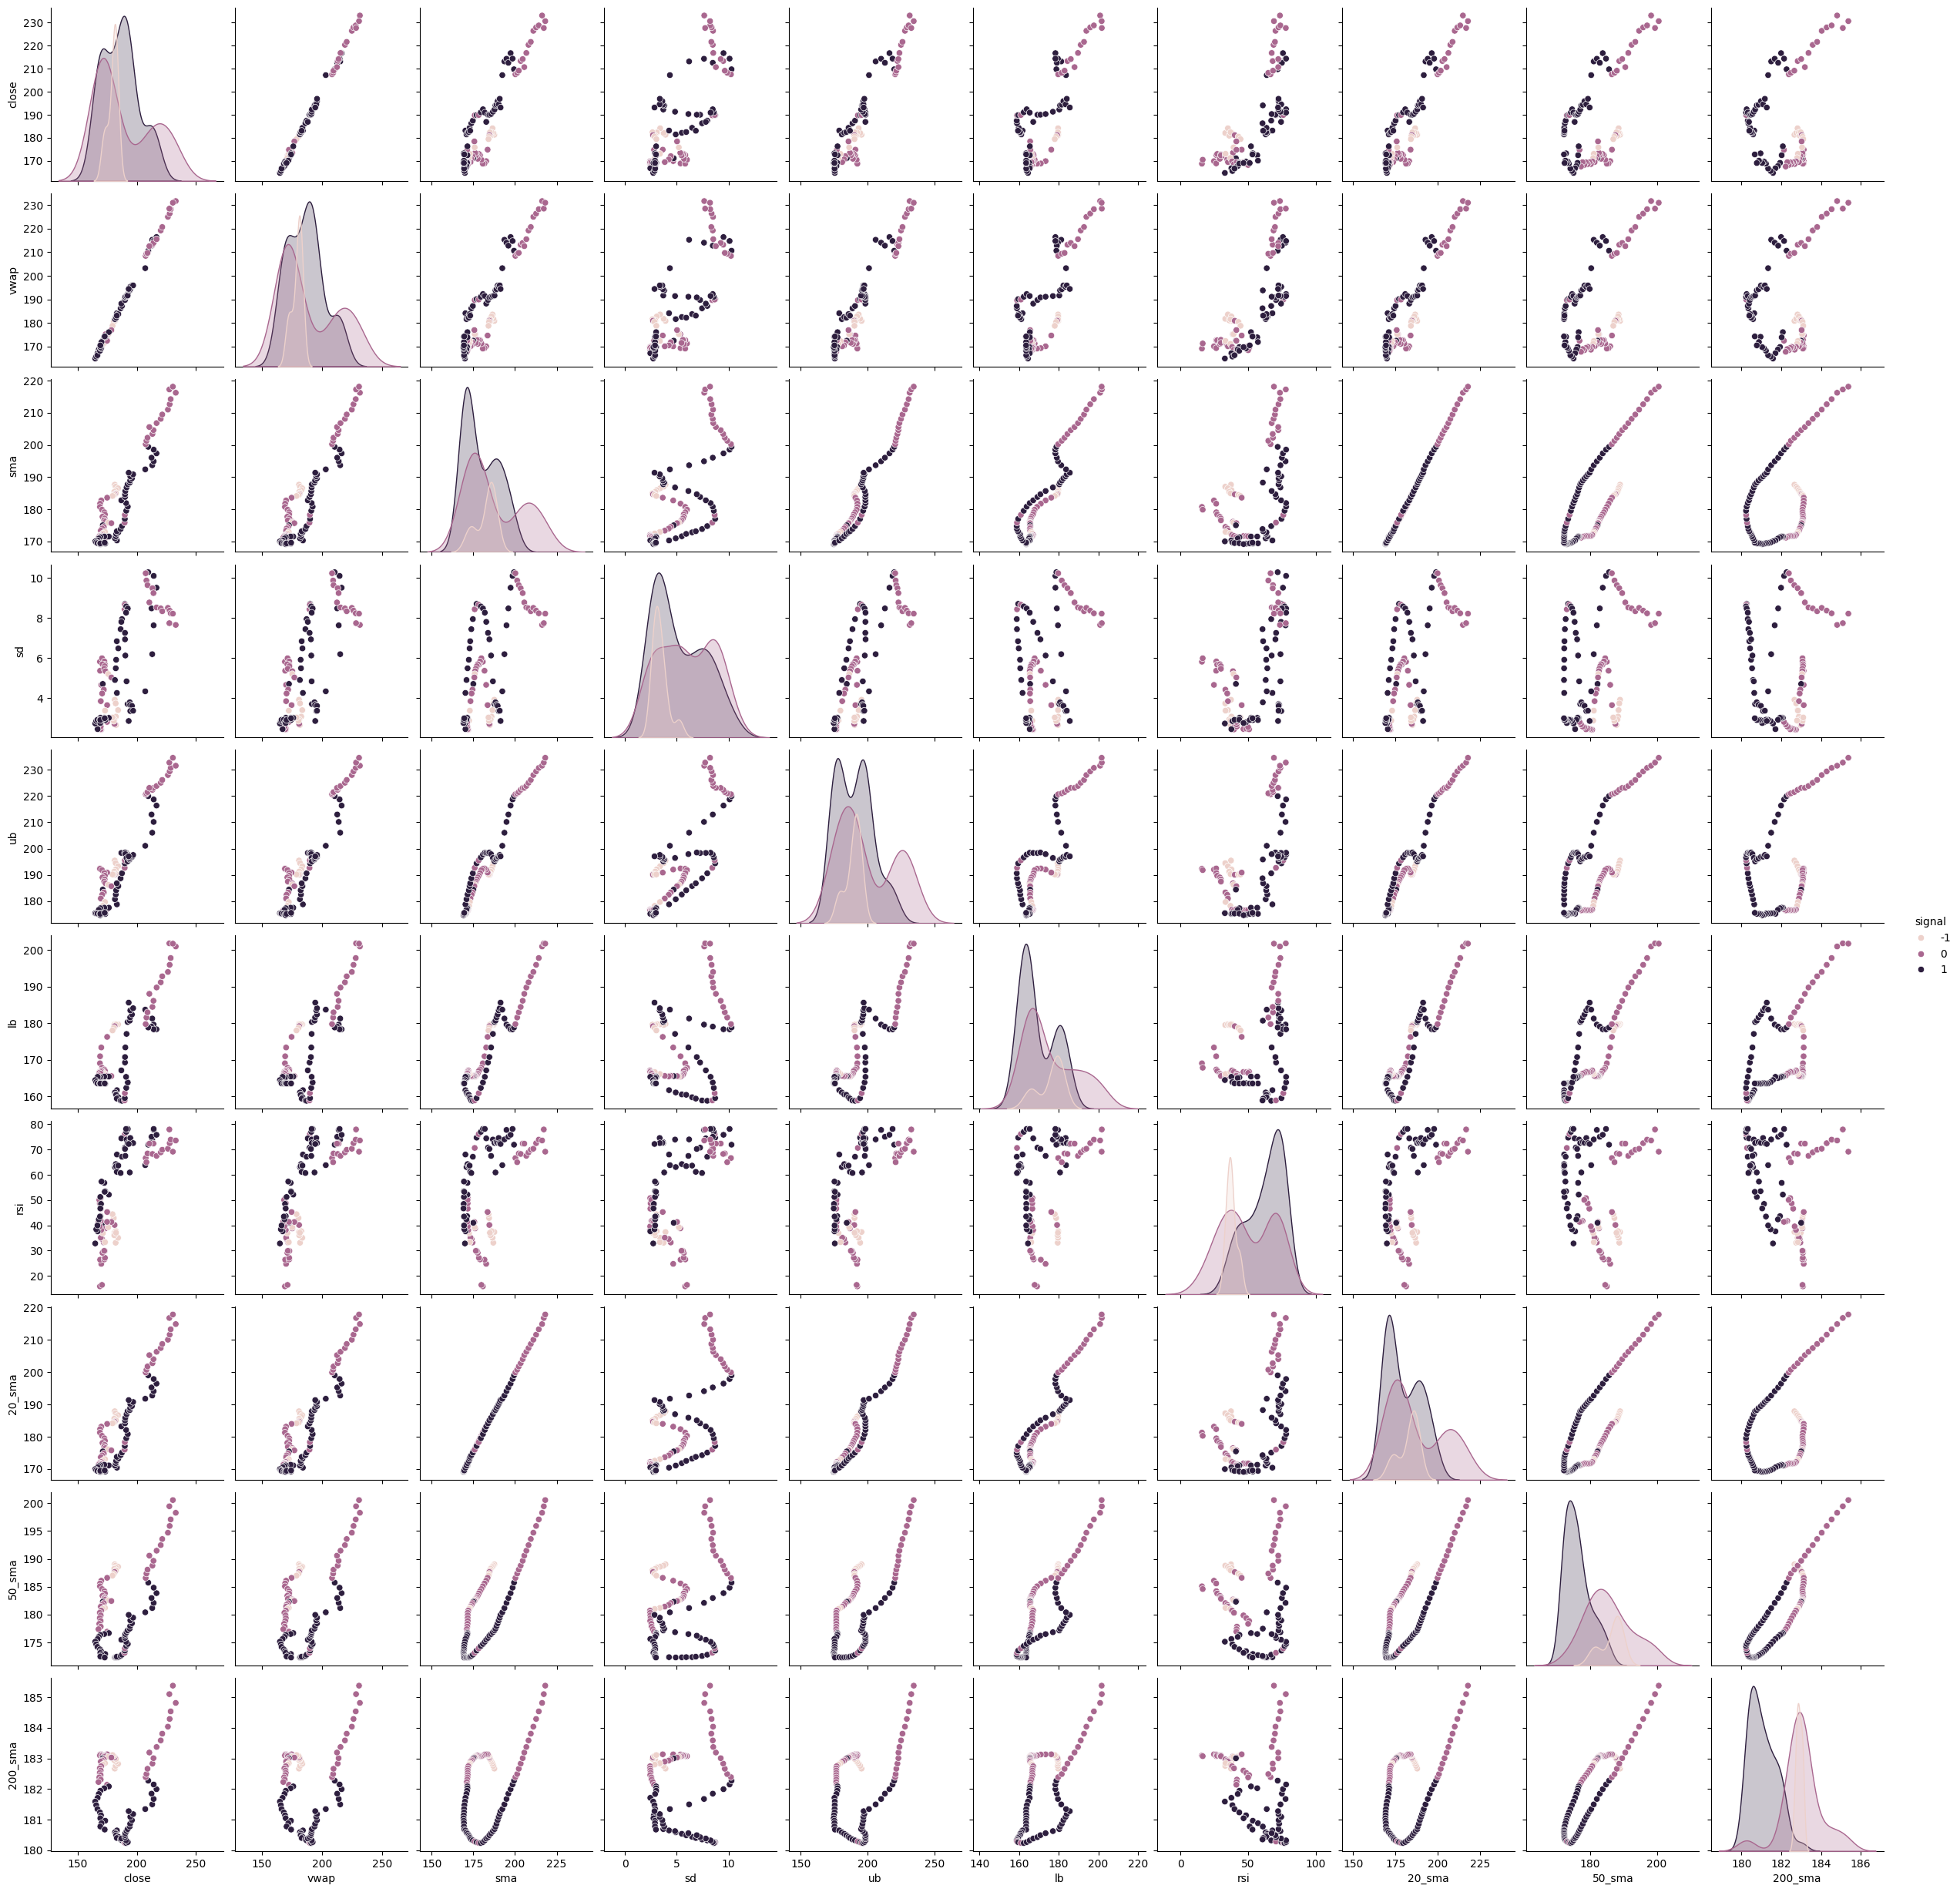

In [31]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

_data = data.copy()

scaler = StandardScaler()

#scaled_data = pd.DataFrame(scaler.fit_transform(_data), columns=_data.keys())

sns.pairplot(_data.iloc[-100:], hue="signal")

## Model 

In [32]:
split_prc = 0.7
train_data = data.iloc[:int(len(data)*split_prc)]
test_data =  data.iloc[int(len(data)*split_prc):]
print(len(data), len(train_data), len(test_data))
assert len(data) == len(train_data) + len(test_data)

2145 1501 644


In [33]:
X_train = train_data.drop(columns=["signal"])
y_train = train_data["signal"].to_frame()


X_test = test_data.drop(columns=["signal"])
y_test = test_data["signal"].to_frame()

In [34]:
y_train.values

array([[-1],
       [-1],
       [-1],
       ...,
       [ 0],
       [-1],
       [ 0]])

In [35]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

params = {
    'n_neighbors': [3,5,7,9,11,13],
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}
pipe = Pipeline([('mms', MinMaxScaler()), ('model', DecisionTreeClassifier())])
model = GridSearchCV(pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
model.fit(X_train.values, y_train.values.flatten())
y_pred = model.predict(X_test.values)
accuracy_score(y_test.values.flatten(), y_pred.flatten(), normalize=True), model.best_params_

(0.3198757763975155,
 {'knn__leaf_size': 15, 'knn__n_neighbors': 7, 'knn__weights': 'distance'})

### Strategy

In [36]:
from numpy import ndarray
from pandas import DataFrame

from cira.strategy import back_test
from tqdm import tqdm


class SvmSigClfStrat(cira.strategy.Strategy):

    def __init__(self) -> None:
        super().__init__(name="SvmSigClf")


    def iterate(self, feature_data: DataFrame, prices: DataFrame, portfolio: ndarray, cash=...) -> ndarray:
        return super().iterate(feature_data, prices, portfolio, cash) 

In [ ]:

horizon = 30
data['return'] = data["close"].pct_change(horizon)
threshold = 0.015
data["signal"] = 0
data.loc[data["return"] > threshold, "signal"] = 1
data["return"].plot(style=".")
data.drop(columns=["return"], inplace=True)
data["signal"].value_counts()